**Exploratory Data Analysis**

**Importing Libraries**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime

%matplotlib inline

In [93]:
!git clone https://github.com/vaibhavv1002/dataset.git

fatal: destination path 'dataset' already exists and is not an empty directory.


**Read CSV files**

In [94]:
plant1_gen = pd.read_csv('/content/dataset/Plant_1_Generation_Data.csv')
plant2_gen = pd.read_csv('/content/dataset/Plant_2_Generation_Data.csv')
plant1_sens = pd.read_csv('/content/dataset/Plant_1_Weather_Sensor_Data.csv')
plant2_sens = pd.read_csv('/content/dataset/Plant_2_Weather_Sensor_Data.csv')


**Data cleaning**

In [95]:
plant1_gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [96]:
plant1_gendaily = plant1_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_gendaily

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,01-06-2020 00:00,0.0,0.0,5407.250000,153519480.0
1,01-06-2020 00:15,0.0,0.0,0.000000,153519480.0
2,01-06-2020 00:30,0.0,0.0,0.000000,153519480.0
3,01-06-2020 00:45,0.0,0.0,0.000000,153519480.0
4,01-06-2020 01:00,0.0,0.0,0.000000,153519480.0
...,...,...,...,...,...
3153,31-05-2020 22:45,0.0,0.0,125291.000000,153519480.0
3154,31-05-2020 23:00,0.0,0.0,125291.000000,153519480.0
3155,31-05-2020 23:15,0.0,0.0,125291.000000,153519480.0
3156,31-05-2020 23:30,0.0,0.0,125291.000000,153519480.0


In [97]:
plant2_gendaily = plant2_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant2_gendaily


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10


Convert DATE_TIME into datetime format

In [98]:
#Plant 1 generation data
from datetime import datetime
# datetime.strptime('07/28/2014 18:54:55.099000', '%m/%d/%Y %H:%M:%S.%f')

# plant1_gendaily['DATE_TIME'] = pd.to_datetime(plant1_gendaily['DATE_TIME']) # Conversion using Pandas built-in method
plant1_gendaily['DATE_TIME'] = plant1_gendaily['DATE_TIME'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
plant1_gendaily['TIME'] = plant1_gendaily['DATE_TIME'].dt.time # Creates new column and passes TIME into time
plant1_gendaily['DATE'] = pd.to_datetime(plant1_gendaily['DATE_TIME'].dt.date) # Creates new column and passes DATE into time

#Plant 2 generation data
plant2_gendaily['DATE_TIME'] = pd.to_datetime(plant2_gendaily['DATE_TIME'])
plant2_gendaily['TIME'] = plant2_gendaily['DATE_TIME'].dt.time
plant2_gendaily['DATE'] = pd.to_datetime(plant2_gendaily['DATE_TIME'].dt.date)

In [99]:
plant1_gendaily.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-06-01 00:00:00,0.0,0.0,5407.25,153519480.0,00:00:00,2020-06-01
1,2020-06-01 00:15:00,0.0,0.0,0.00,153519480.0,00:15:00,2020-06-01
2,2020-06-01 00:30:00,0.0,0.0,0.00,153519480.0,00:30:00,2020-06-01
3,2020-06-01 00:45:00,0.0,0.0,0.00,153519480.0,00:45:00,2020-06-01
4,2020-06-01 01:00:00,0.0,0.0,0.00,153519480.0,01:00:00,2020-06-01


In [100]:
plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [101]:
plant1_gendaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   TIME         3158 non-null   object        
 6   DATE         3158 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 172.8+ KB


**Descriptive analytics**

In [102]:
plant1_gendaily.describe()


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
count,3158,3158.000000,3158.000000,3158.000000,3.158000e+03,3158
mean,2020-06-01 06:42:44.344521728,68547.713729,6703.628149,71782.817545,1.519892e+08,2020-05-31 18:42:38.074730752
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,2.654004e+07,2020-05-15 00:00:00
25%,2020-05-23 23:18:45,0.000000,0.000000,90.750000,1.520976e+08,2020-05-23 00:00:00
50%,2020-06-01 12:37:30,8515.285714,823.033036,66068.000000,1.535320e+08,2020-06-01 00:00:00
75%,2020-06-09 17:56:15,140386.504463,13750.606696,129398.500000,1.549950e+08,2020-06-09 00:00:00
max,2020-06-17 23:45:00,298937.785710,29150.212499,193770.000000,1.561428e+08,2020-06-17 00:00:00
std,NaN,88044.612181,8603.120476,65974.417997,1.061670e+07,NaN


In [103]:
plant2_gendaily.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
count,3259,3259.000000,3259.000000,3259.000000,3.259000e+03,3259
mean,2020-06-01 00:04:35.053697536,5124.648465,5011.974903,68443.535809,1.368802e+10,2020-05-31 12:12:35.569193216
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,2020-05-15 00:00:00
25%,2020-05-23 12:07:30,0.000000,0.000000,18698.245238,1.335913e+10,2020-05-23 00:00:00
50%,2020-06-01 00:00:00,494.427143,477.536667,73875.000000,1.419016e+10,2020-06-01 00:00:00
75%,2020-06-09 12:07:30,11048.773333,10795.727619,110975.223810,1.419312e+10,2020-06-09 00:00:00
max,2020-06-17 23:45:00,26630.506667,25979.760476,162876.000000,1.419408e+10,2020-06-17 00:00:00
std,NaN,6462.118509,6317.872611,48505.077129,1.245968e+09,NaN


Check for missing values

In [104]:
plant1_gen.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Plant 1 Generation Data


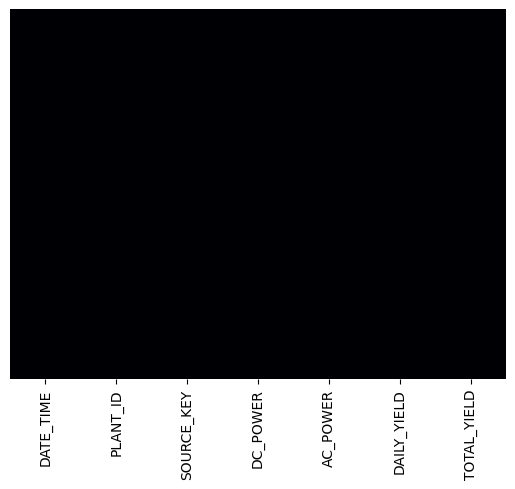

Plant 2 Generation Data


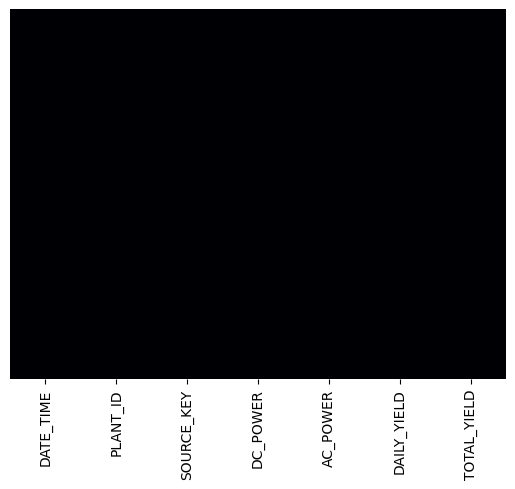

In [105]:
print('Plant 1 Generation Data')
sbn.heatmap(plant1_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Generation Data')
sbn.heatmap(plant2_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()


Check for faulty inverters/module

In [106]:
print('There are {} inverters in Solar Power Plant 1.'.format(plant1_gen['SOURCE_KEY'].nunique()))
print('There are {} inverters in Solar Power Plant 2.'.format(plant2_gen['SOURCE_KEY'].nunique()))

There are 22 inverters in Solar Power Plant 1.
There are 22 inverters in Solar Power Plant 2.


Plant 1 Inverters


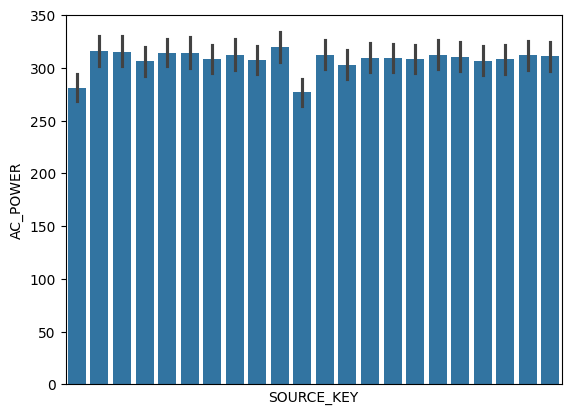

Plant 2 Inverters


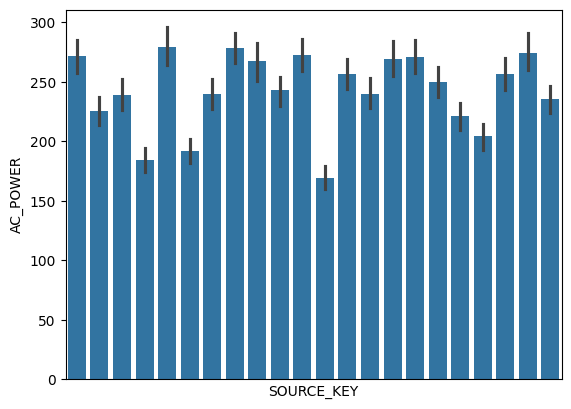

In [107]:
print('Plant 1 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant1_gen)
plt.xticks([])
plt.show()

print('Plant 2 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant2_gen)
plt.xticks([])
plt.show()


**Observe relationship between power generation data features**

In [108]:
plant1_gen.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

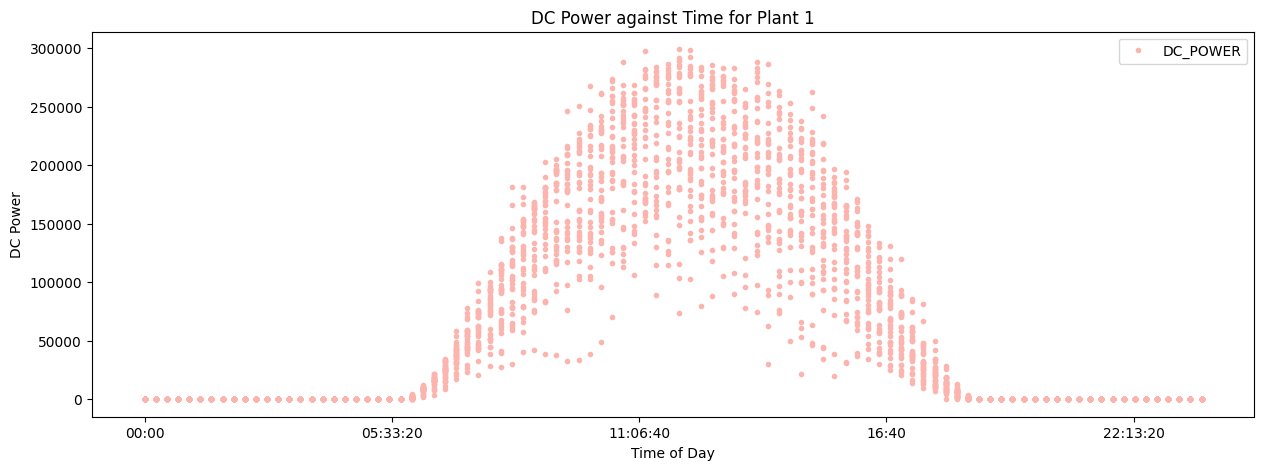

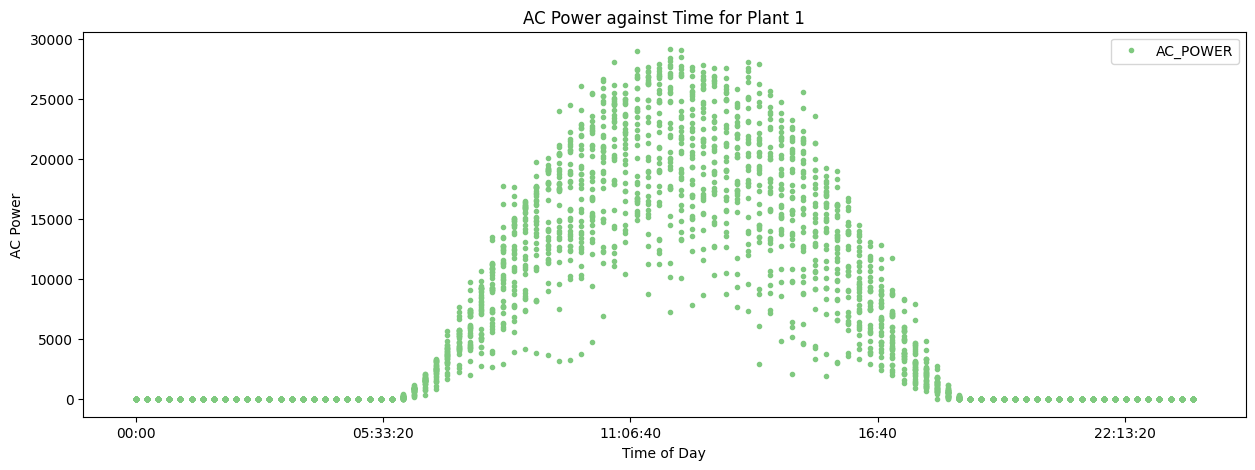

In [109]:
plant1_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 1')
plt.show()

plant1_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent')
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 1')
plt.show()

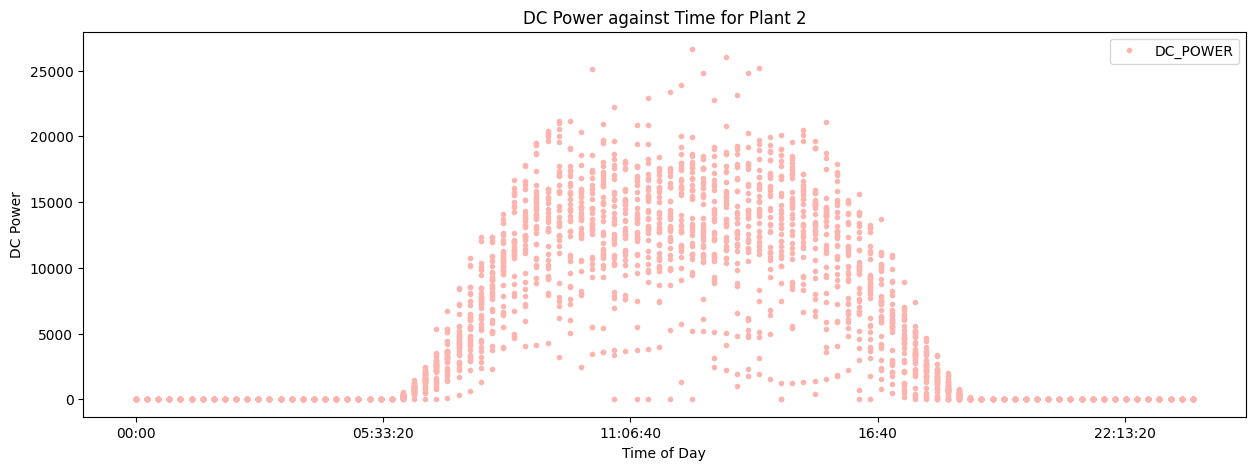

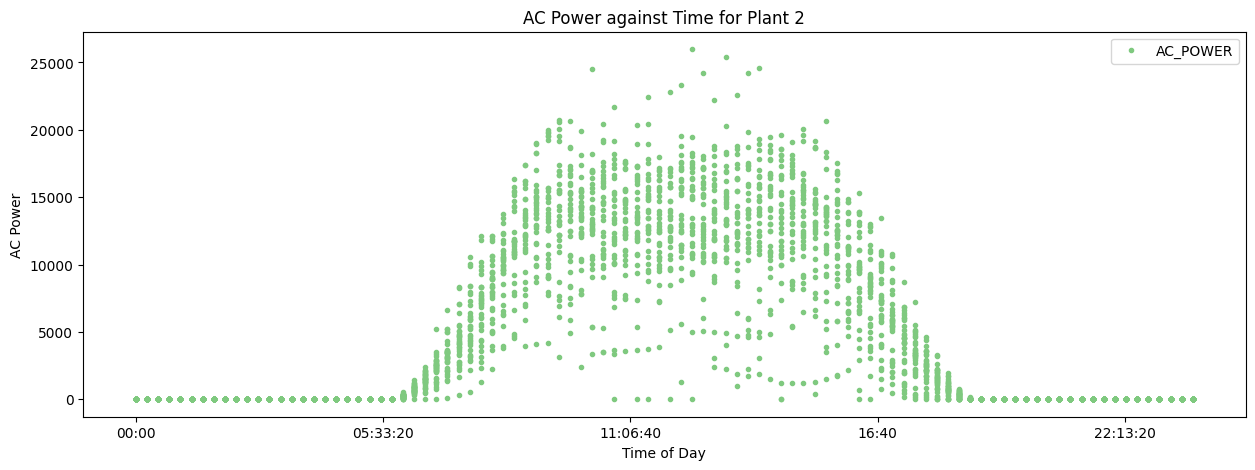

In [110]:
plant2_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 2')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent')
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 2')
plt.show()

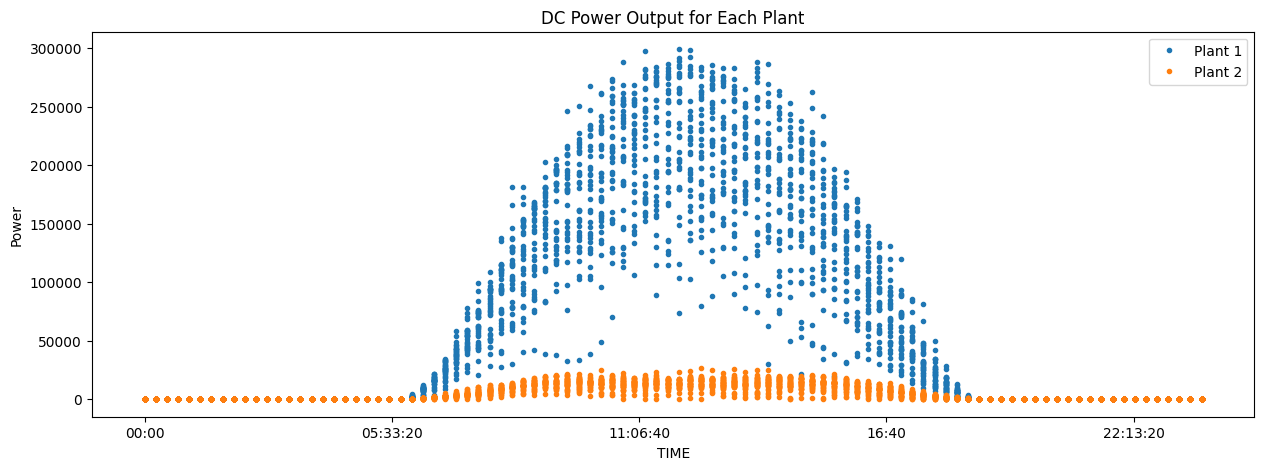

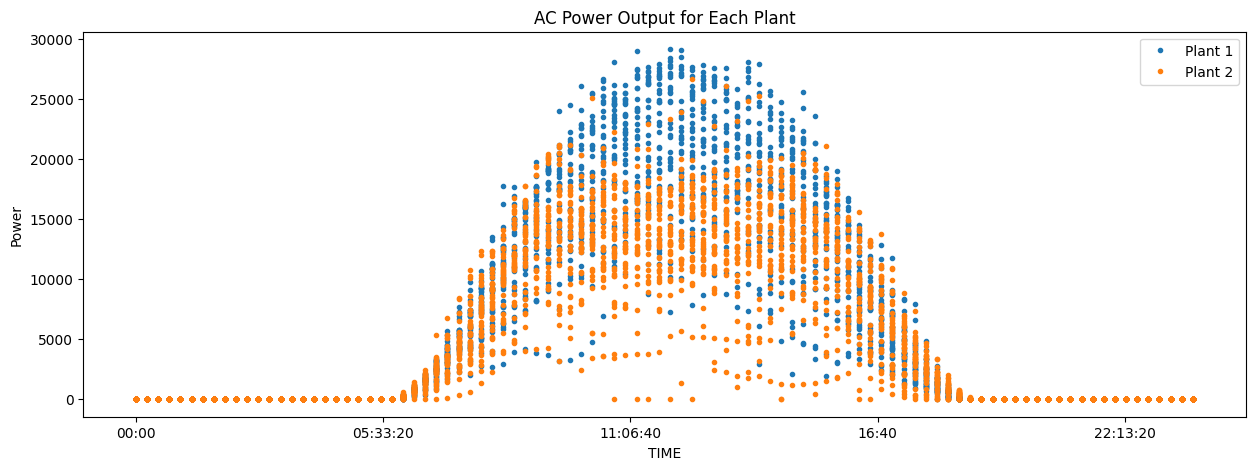

In [111]:
# DC output from solar module
DCcompare = plant1_gendaily.plot(x='TIME', y='DC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=DCcompare)
plt.title('DC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

# AC output from inverter
ACcompare = plant1_gendaily.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=ACcompare)
plt.title('AC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

In [112]:
NUM_COLS=plant1_gen.select_dtypes(['float64','int64']).columns.tolist()



In [113]:
NUM_COLS.remove('PLANT_ID')


**Correlation coefficient and matrix**

In [114]:
g1 = plant1_gen[NUM_COLS].corr()

g2 = plant2_gen[NUM_COLS].corr()

print('Plant 1 Generation Data Correlation Coefficient')
print(g1)

print('Plant 2 Generation Data Correlation Coefficient')
print(g2)

Plant 1 Generation Data Correlation Coefficient
             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999996     0.082284     0.003815
AC_POWER     0.999996  1.000000     0.082234     0.003804
DAILY_YIELD  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD  0.003815  0.003804     0.009867     1.000000
Plant 2 Generation Data Correlation Coefficient
             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999997     0.005593     0.004528
AC_POWER     0.999997  1.000000     0.005395     0.004533
DAILY_YIELD  0.005593  0.005395     1.000000    -0.068472
TOTAL_YIELD  0.004528  0.004533    -0.068472     1.000000


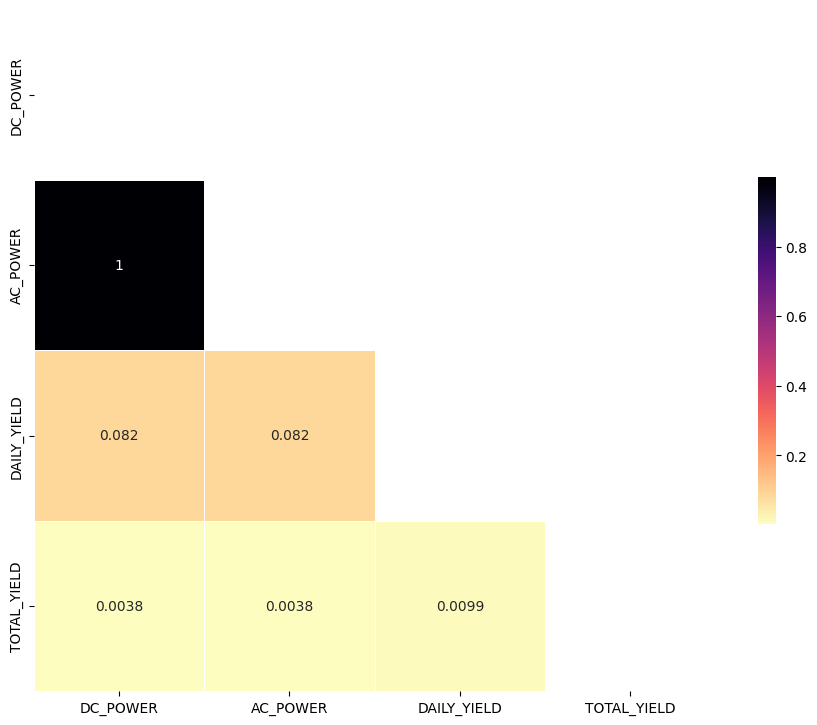

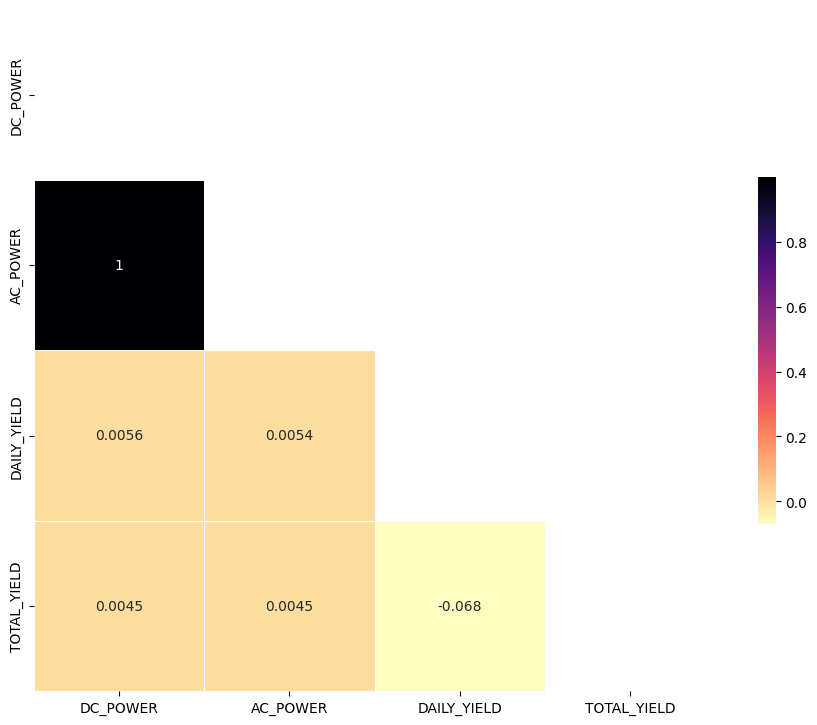

In [115]:
g1mask = np.triu(np.ones_like(g1, dtype=bool))
g2mask = np.triu(np.ones_like(g2, dtype=bool))

cmap = 'magma_r'

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g1, mask=g1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g2, mask=g2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


**Observe relationship between sensor data features**

In [116]:
plant1_sens

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [117]:
plant1_sensdaily = plant1_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant1_sensdaily

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,HmiyD2TTLFNqkNe
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,HmiyD2TTLFNqkNe
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,HmiyD2TTLFNqkNe
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,HmiyD2TTLFNqkNe
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,HmiyD2TTLFNqkNe
...,...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0,HmiyD2TTLFNqkNe
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0,HmiyD2TTLFNqkNe
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0,HmiyD2TTLFNqkNe
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0,HmiyD2TTLFNqkNe


In [118]:
plant2_sensdaily = plant2_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant2_sensdaily

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,iq8k7ZNt4Mwm3w0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,iq8k7ZNt4Mwm3w0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,iq8k7ZNt4Mwm3w0
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,iq8k7ZNt4Mwm3w0
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,iq8k7ZNt4Mwm3w0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,iq8k7ZNt4Mwm3w0
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,iq8k7ZNt4Mwm3w0
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,iq8k7ZNt4Mwm3w0
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,iq8k7ZNt4Mwm3w0


Convert DATE_TIME into datetime format

In [119]:
#Plant 1 sensor data
plant1_sensdaily['DATE_TIME'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'])
plant1_sensdaily['TIME'] = plant1_sensdaily['DATE_TIME'].dt.time
plant1_sensdaily['DATE'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'].dt.date)

#Plant 2 sensor data
plant2_sensdaily['DATE_TIME'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'])
plant2_sensdaily['TIME'] = plant2_sensdaily['DATE_TIME'].dt.time
plant2_sensdaily['DATE'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'].dt.date)

In [120]:
plant1_sensdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
 4   SOURCE_KEY           3182 non-null   object        
 5   TIME                 3182 non-null   object        
 6   DATE                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 174.1+ KB


Check for missing values

Plant 1 Sensor Data


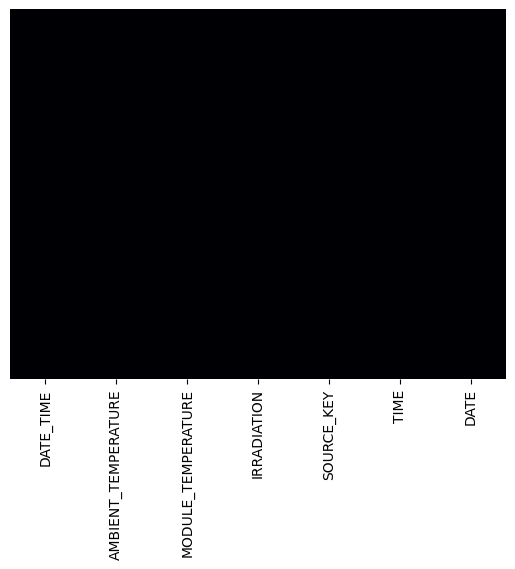

Plant 2 Sensor Data


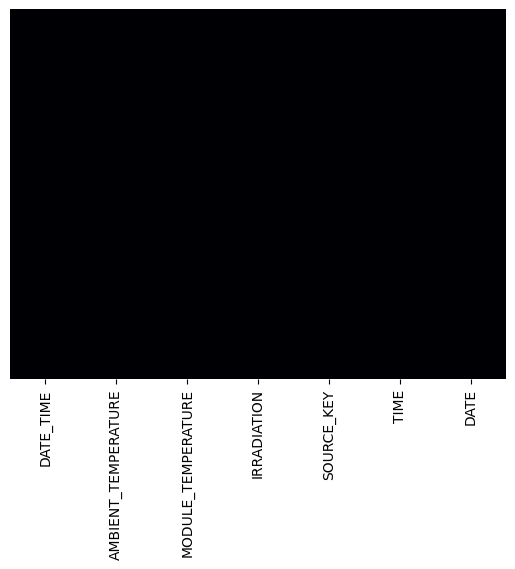

In [121]:
print('Plant 1 Sensor Data')
sbn.heatmap(plant1_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Sensor Data')
sbn.heatmap(plant2_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

In [122]:
plant1_sensdaily.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'SOURCE_KEY', 'TIME', 'DATE'],
      dtype='object')

In [123]:
plant1_sensdaily['DATE'].nunique()

34

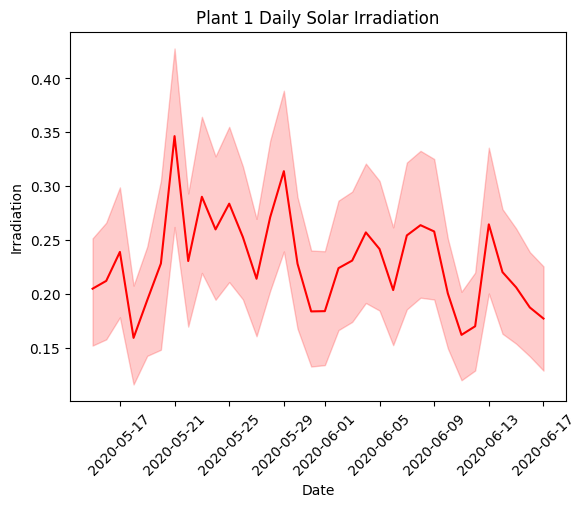

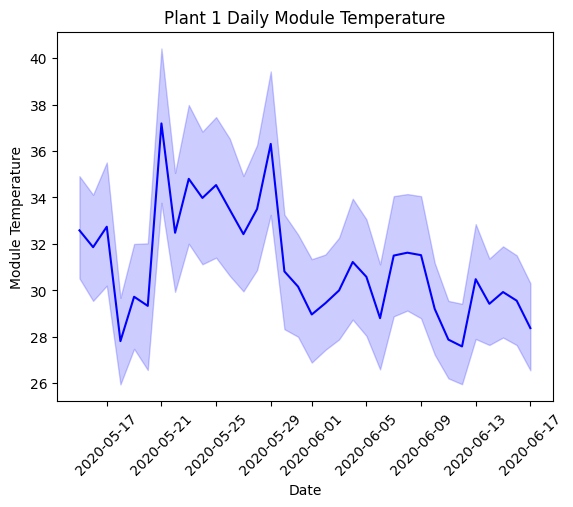

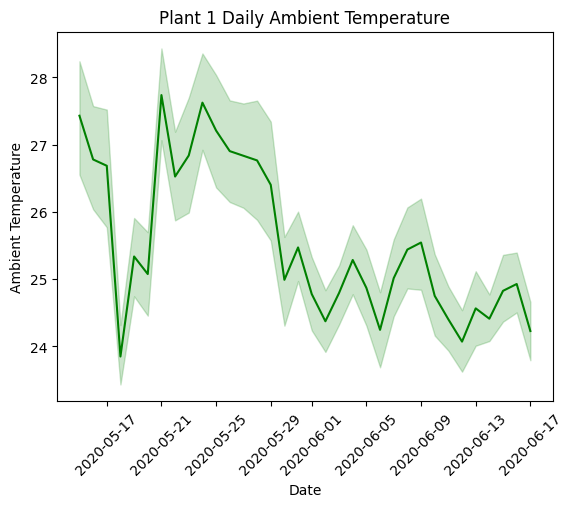

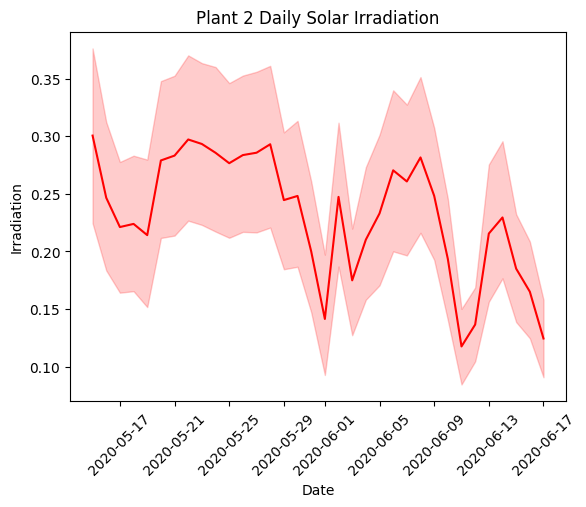

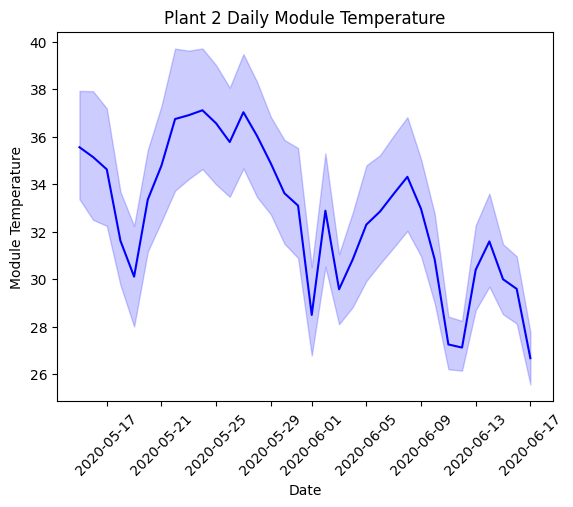

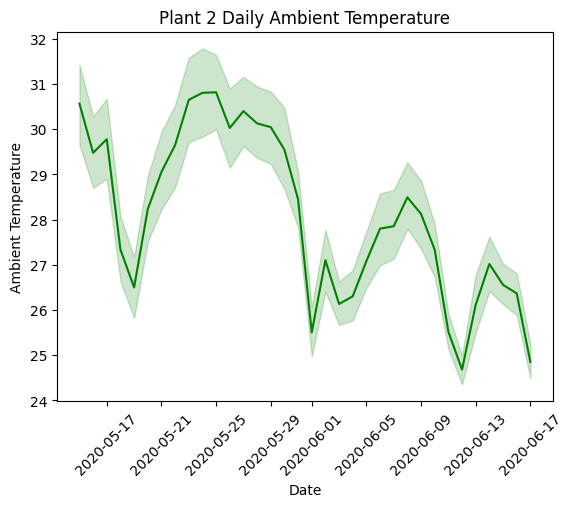

In [124]:
#Plant 1
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 1 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()
#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

#Plant 2
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 2 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()
#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

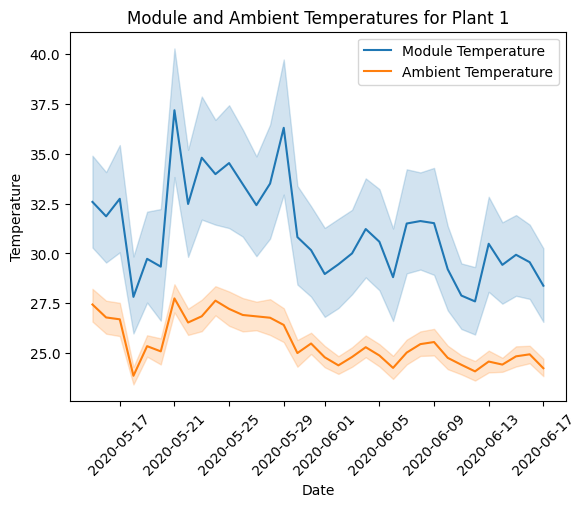

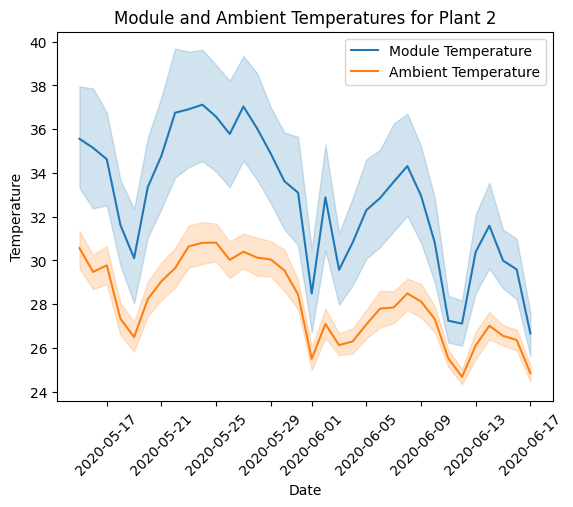

In [125]:
# Plant 1 temperature sensors
tempsens_plant1 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant1)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xticks(rotation=45)
plt.show()

# Plant 2 temperature sensors
tempsens_plant2 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xticks(rotation=45)
plt.show()

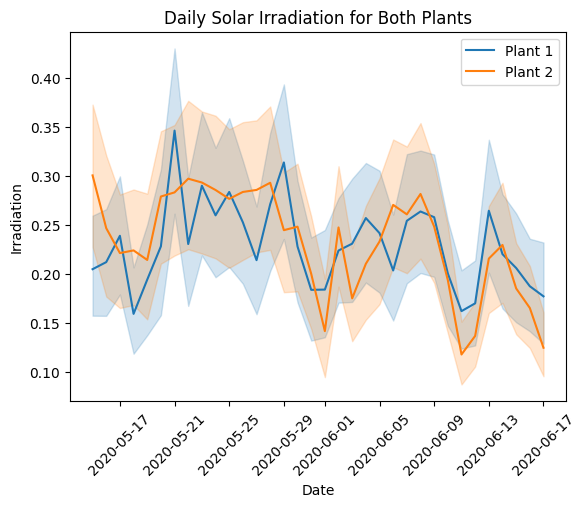

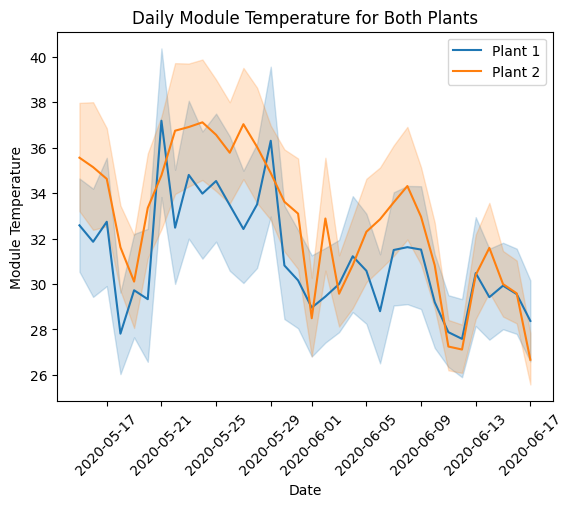

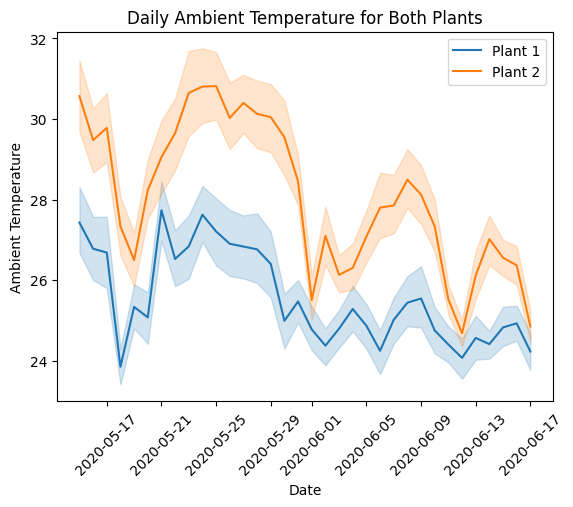

In [126]:
# Comparing both plants
# Daily Irradiation
ambient_compare = sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambient_compare)
plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Module Temperature
modtemp_compare = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=modtemp_compare)
plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()
# Daily Ambient Temperature
ambtemp_compare = sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambtemp_compare)
plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

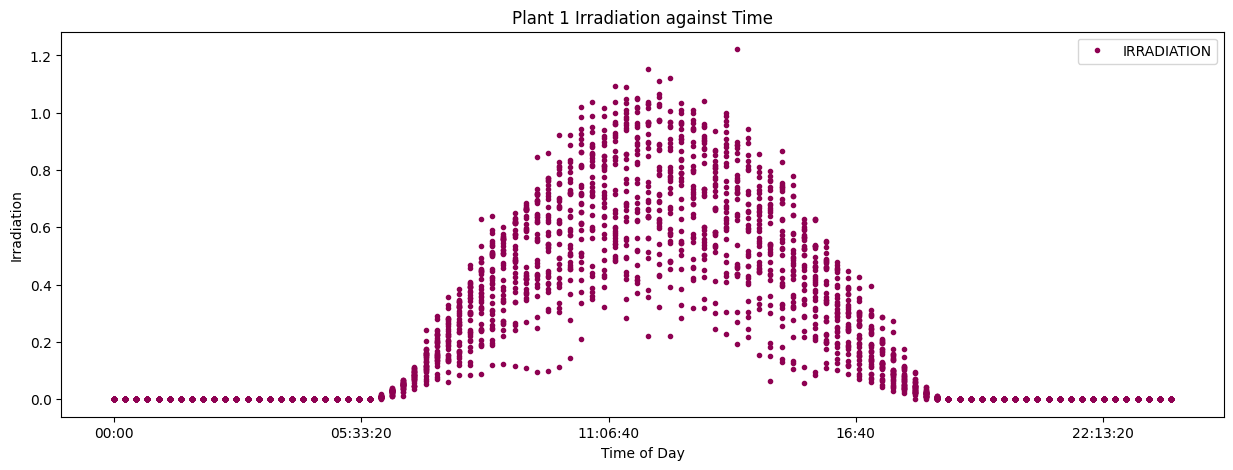

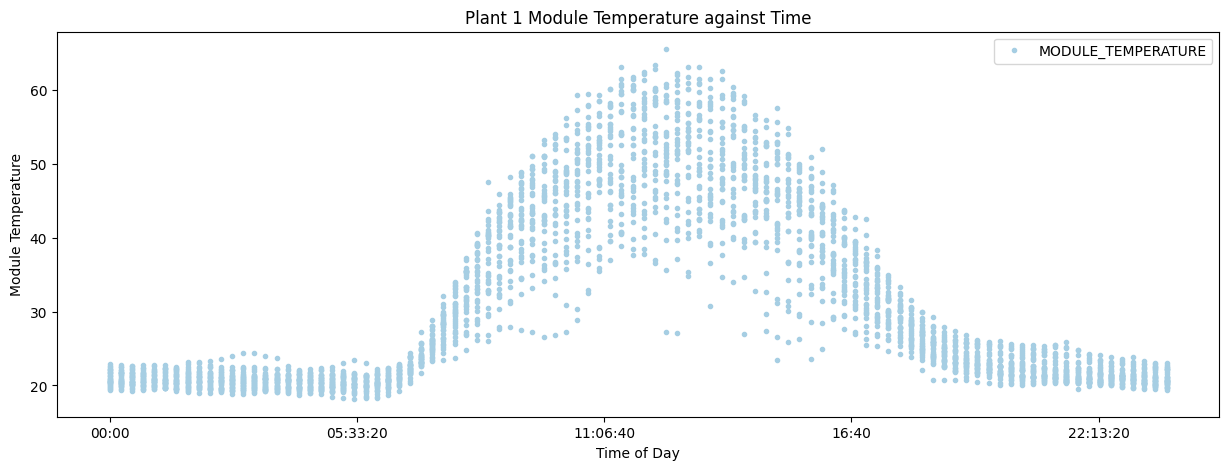

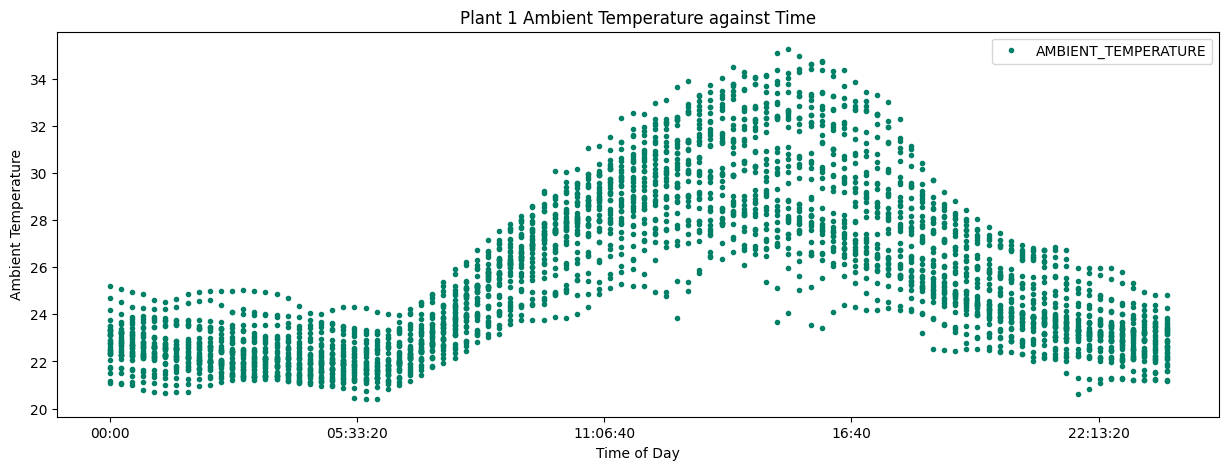

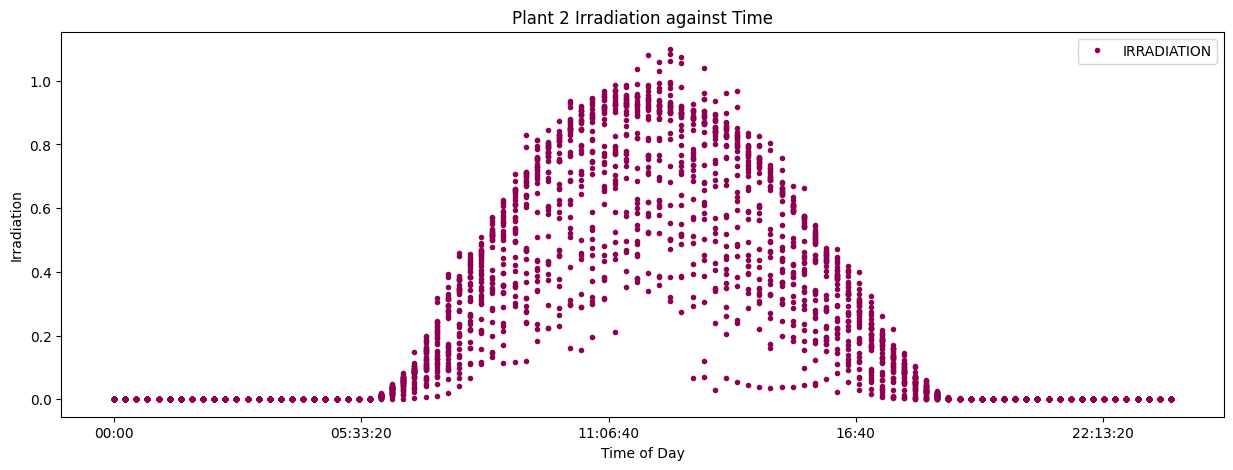

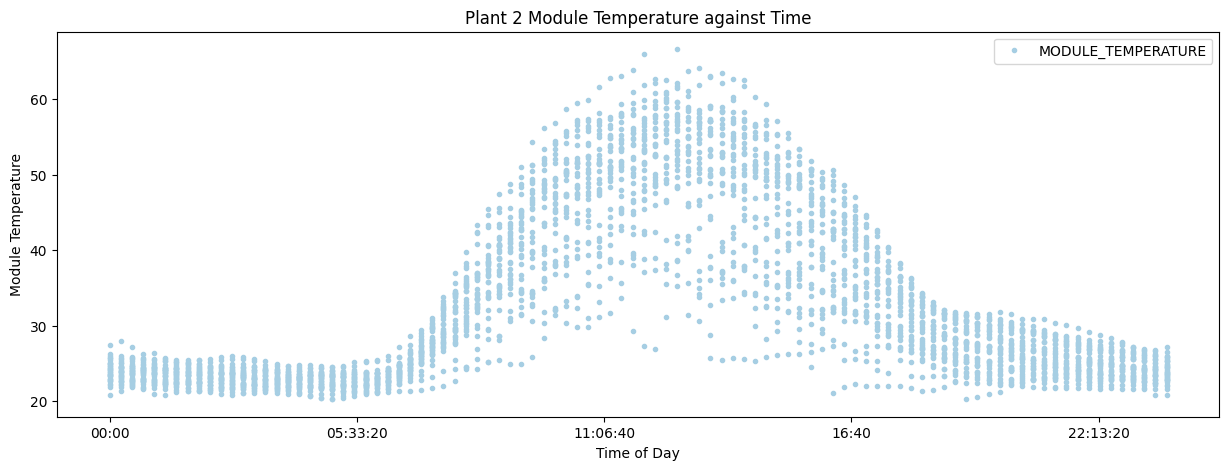

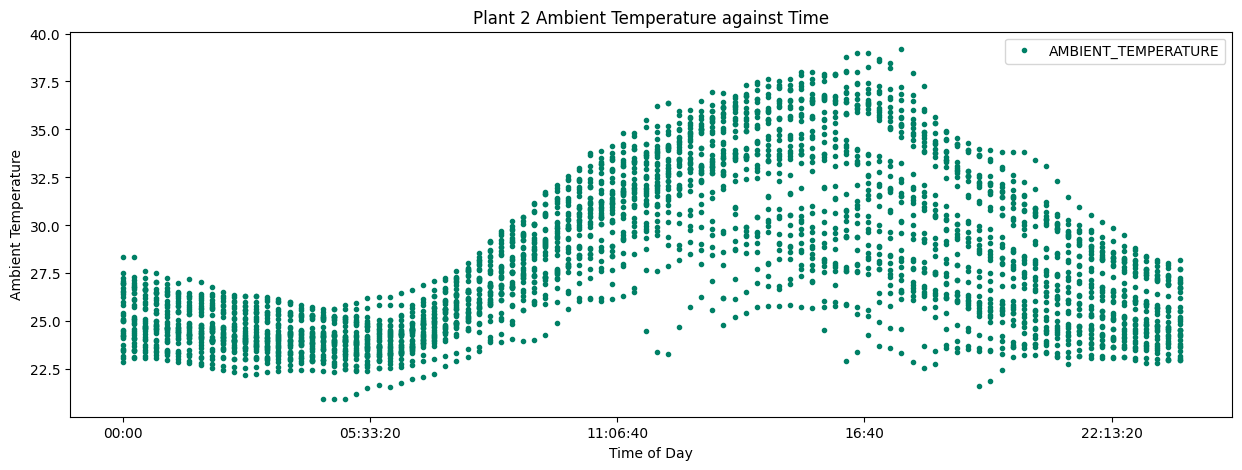

In [127]:
# Plant 1
# Irradiation
plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 1 Irradiation against Time')
plt.show()

# Module Temperature
plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired')
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer')
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Ambient Temperature against Time')
plt.show()
# Plant 2
# Irradiation
plant2_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 2 Irradiation against Time')
plt.show()

# Module Temperature
plant2_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired')
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant2_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer')
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Ambient Temperature against Time')
plt.show()

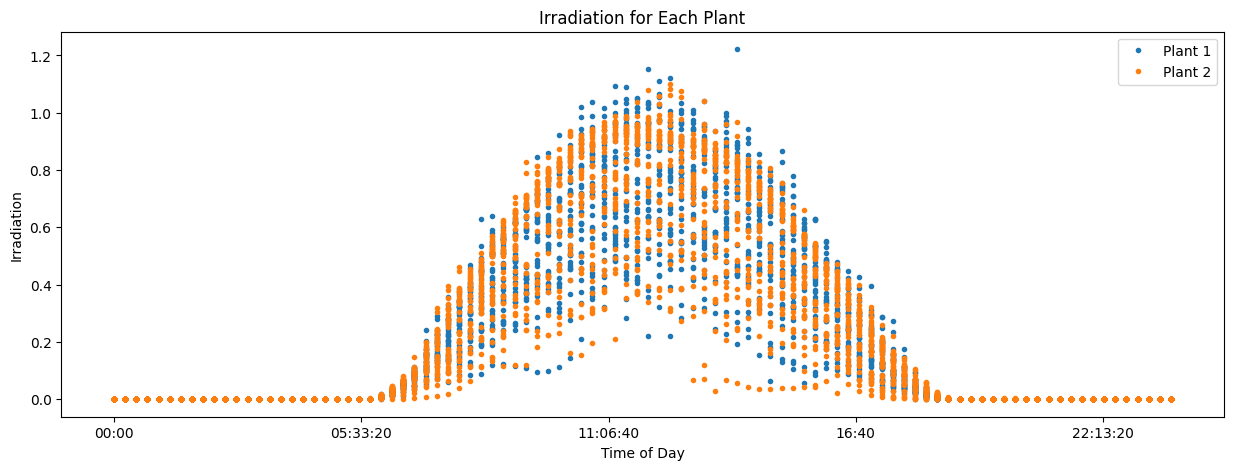

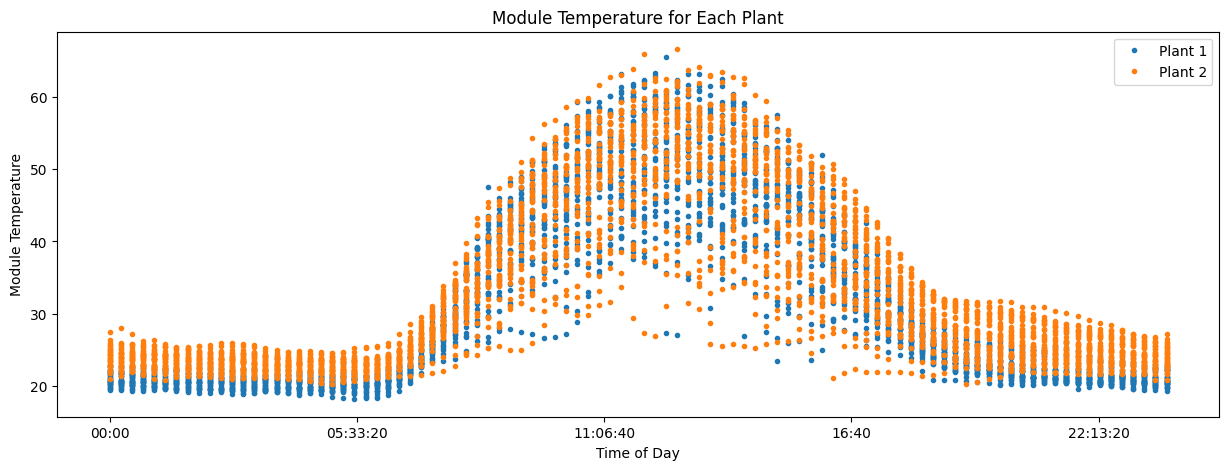

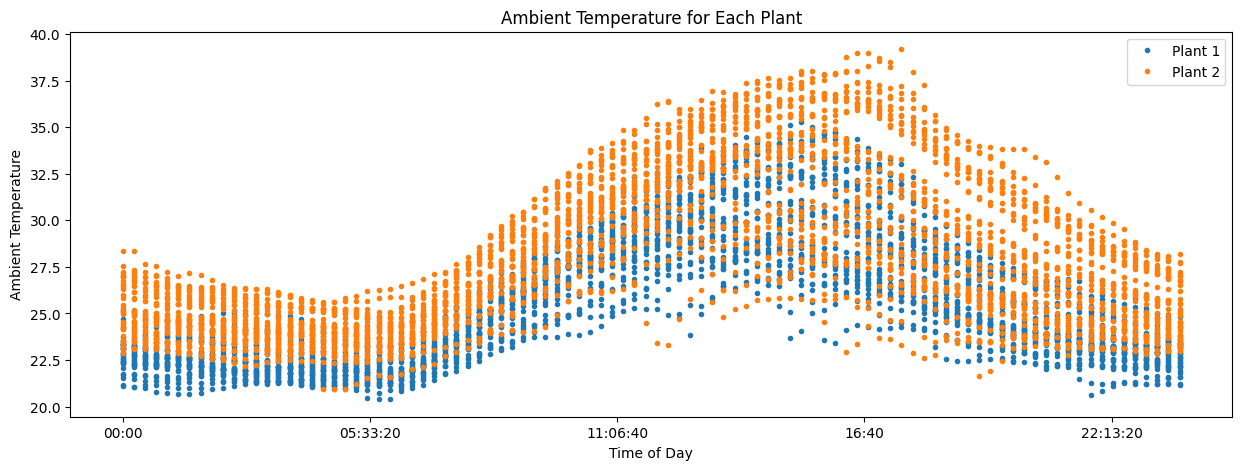

In [128]:
# Hourly sens for each plant

# Irradiation
irr_hour = plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 2', ax=irr_hour)
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Irradiation for Each Plant')
plt.show()

# Module temperature
modtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 2', ax=modtemp_hour)
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Module Temperature for Each Plant')
plt.show()

# Ambient temperature
ambtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 2', ax=ambtemp_hour)
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Ambient Temperature for Each Plant')
plt.show()


**Merge sensor data and generation data**

In [129]:
mergedata1 = plant1_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,TIME_x,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_y,DATE_y
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,HmiyD2TTLFNqkNe,00:00:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,HmiyD2TTLFNqkNe,00:15:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,HmiyD2TTLFNqkNe,00:30:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,HmiyD2TTLFNqkNe,00:45:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,HmiyD2TTLFNqkNe,01:00:00,2020-05-15,0.0,0.0,0.0,150761642.0,01:00:00,2020-05-15


In [130]:
mergedata2 = plant2_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata2.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,TIME_x,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_y,DATE_y
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,iq8k7ZNt4Mwm3w0,00:00:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,iq8k7ZNt4Mwm3w0,00:15:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,iq8k7ZNt4Mwm3w0,00:30:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,iq8k7ZNt4Mwm3w0,00:45:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,iq8k7ZNt4Mwm3w0,01:00:00,2020-05-15,0.0,0.0,0.0,150761642.0,01:00:00,2020-05-15


In [131]:
# Remove unneeded columns

mergedata1.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)
mergedata2.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)

In [132]:
mergedata1

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,HmiyD2TTLFNqkNe,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,HmiyD2TTLFNqkNe,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,HmiyD2TTLFNqkNe,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,HmiyD2TTLFNqkNe,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,HmiyD2TTLFNqkNe,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...,...,...,...,...
3152,2020-06-17 22:45:00,22.150570,21.480377,0.0,HmiyD2TTLFNqkNe,0.0,0.0,129571.000000,156142755.0
3153,2020-06-17 23:00:00,22.129816,21.389024,0.0,HmiyD2TTLFNqkNe,0.0,0.0,129571.000000,156142755.0
3154,2020-06-17 23:15:00,22.008275,20.709211,0.0,HmiyD2TTLFNqkNe,0.0,0.0,129571.000000,156142755.0
3155,2020-06-17 23:30:00,21.969495,20.734963,0.0,HmiyD2TTLFNqkNe,0.0,0.0,129571.000000,156142755.0


In [133]:
mergedata2

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...,...,...,...,...
3149,2020-06-17 22:45:00,23.511703,22.856201,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,129571.000000,156142755.0
3150,2020-06-17 23:00:00,23.482282,22.744190,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,129571.000000,156142755.0
3151,2020-06-17 23:15:00,23.354743,22.492245,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,129571.000000,156142755.0
3152,2020-06-17 23:30:00,23.291048,22.373909,0.0,iq8k7ZNt4Mwm3w0,0.0,0.0,129571.000000,156142755.0


In [134]:
mergedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3157 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3157 non-null   float64       
 2   MODULE_TEMPERATURE   3157 non-null   float64       
 3   IRRADIATION          3157 non-null   float64       
 4   SOURCE_KEY           3157 non-null   object        
 5   DC_POWER             3157 non-null   float64       
 6   AC_POWER             3157 non-null   float64       
 7   DAILY_YIELD          3157 non-null   float64       
 8   TOTAL_YIELD          3157 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 222.1+ KB


In [135]:
mergedata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3154 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3154 non-null   float64       
 2   MODULE_TEMPERATURE   3154 non-null   float64       
 3   IRRADIATION          3154 non-null   float64       
 4   SOURCE_KEY           3154 non-null   object        
 5   DC_POWER             3154 non-null   float64       
 6   AC_POWER             3154 non-null   float64       
 7   DAILY_YIELD          3154 non-null   float64       
 8   TOTAL_YIELD          3154 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 221.9+ KB


In [136]:
NUM_COLS=mergedata1.select_dtypes(['float64','int64']).columns.tolist()
NUM_COLS

['AMBIENT_TEMPERATURE',
 'MODULE_TEMPERATURE',
 'IRRADIATION',
 'DC_POWER',
 'AC_POWER',
 'DAILY_YIELD',
 'TOTAL_YIELD']

In [137]:
#correlation coefficient for merged data
m1 = mergedata1[NUM_COLS].corr()

m2 = mergedata2[NUM_COLS].corr()

print('Plant 1 Generation and Sensor Data Correlation Coefficient')
print(m1)
print('')

print('Plant 2 Generation and Sensor Data Correlation Coefficient')
print(m2)

Plant 1 Generation and Sensor Data Correlation Coefficient
                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.853162     0.721839   
MODULE_TEMPERATURE              0.853162            1.000000     0.961422   
IRRADIATION                     0.721839            0.961422     1.000000   
DC_POWER                        0.725679            0.960939     0.995957   
AC_POWER                        0.725879            0.961011     0.995864   
DAILY_YIELD                     0.498010            0.212765     0.089470   
TOTAL_YIELD                    -0.039269            0.069338     0.102223   

                     DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  
AMBIENT_TEMPERATURE  0.725679  0.725879     0.498010    -0.039269  
MODULE_TEMPERATURE   0.960939  0.961011     0.212765     0.069338  
IRRADIATION          0.995957  0.995864     0.089470     0.102223  
DC_POWER             1.000000  0.999997     0.092450

Plant 1


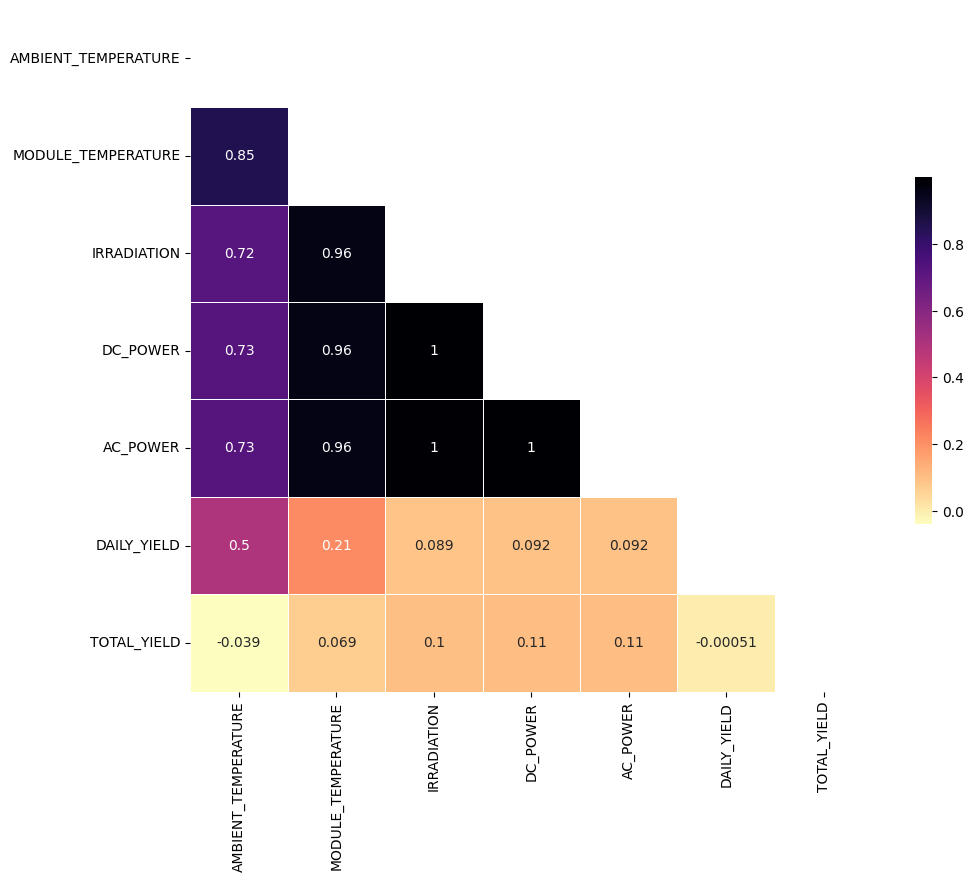

Plant 2


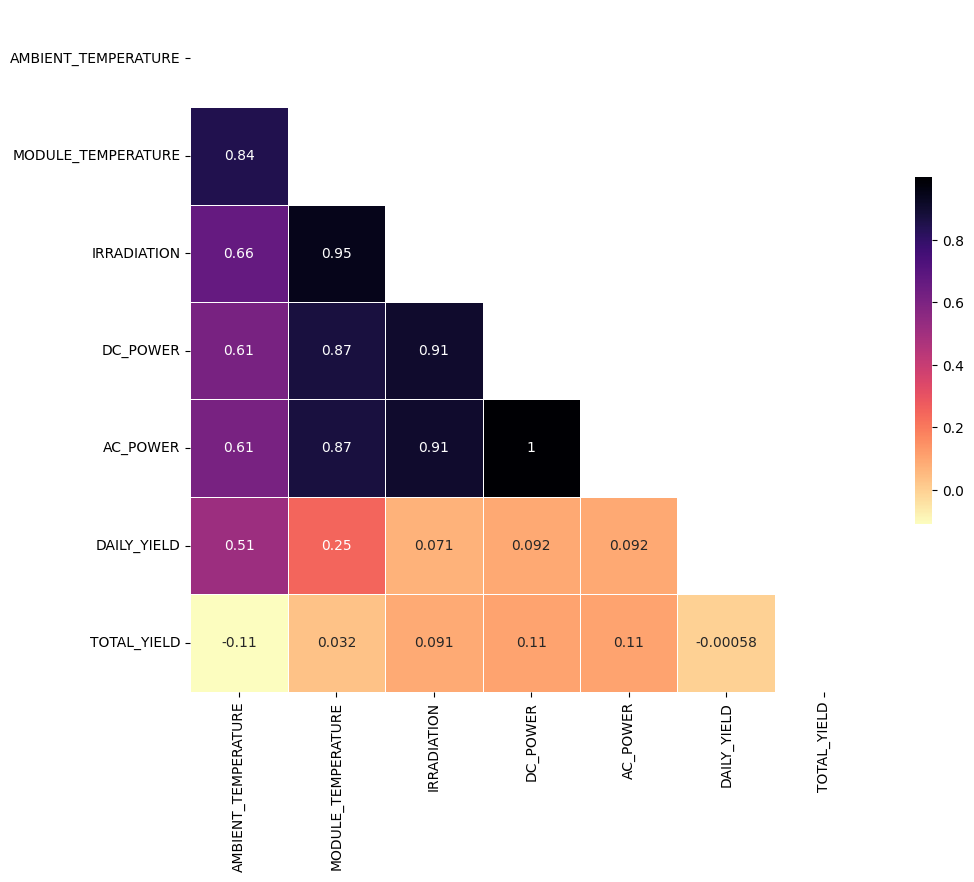

In [138]:
s1mask = np.triu(np.ones_like(m1, dtype=bool))
s2mask = np.triu(np.ones_like(m2, dtype=bool))

cmap = 'magma_r'

print('Plant 1')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(m1, mask=s1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

print('Plant 2')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(m2, mask=s2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


Sorting correlation pairs

In [139]:
# Plant 1
c1 = m1.unstack()
sort1 = c1.sort_values(kind="quicksort")
print('Plant 1 Top Correlations:')
print(sort1[22:42])
print('')

# Plant 2
c2 = m2.unstack()
sort2 = c2.sort_values(kind="quicksort")
print('Plant 2 Top Correlations:')
print(sort2[22:42])


Plant 1 Top Correlations:
IRRADIATION          AMBIENT_TEMPERATURE    0.721839
AMBIENT_TEMPERATURE  IRRADIATION            0.721839
DC_POWER             AMBIENT_TEMPERATURE    0.725679
AMBIENT_TEMPERATURE  DC_POWER               0.725679
AC_POWER             AMBIENT_TEMPERATURE    0.725879
AMBIENT_TEMPERATURE  AC_POWER               0.725879
                     MODULE_TEMPERATURE     0.853162
MODULE_TEMPERATURE   AMBIENT_TEMPERATURE    0.853162
DC_POWER             MODULE_TEMPERATURE     0.960939
MODULE_TEMPERATURE   DC_POWER               0.960939
AC_POWER             MODULE_TEMPERATURE     0.961011
MODULE_TEMPERATURE   AC_POWER               0.961011
IRRADIATION          MODULE_TEMPERATURE     0.961422
MODULE_TEMPERATURE   IRRADIATION            0.961422
IRRADIATION          AC_POWER               0.995864
AC_POWER             IRRADIATION            0.995864
IRRADIATION          DC_POWER               0.995957
DC_POWER             IRRADIATION            0.995957
                    

**Training and Prediction**

In [140]:
mergedata1.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

Plant 1


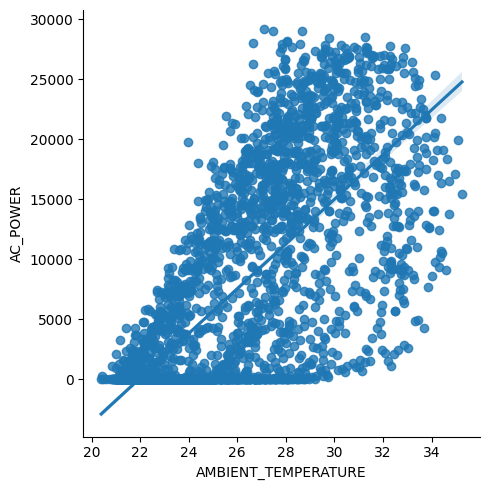

In [141]:
sbn.lmplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=mergedata1)
print('Plant 1')
plt.show()

Plant 2


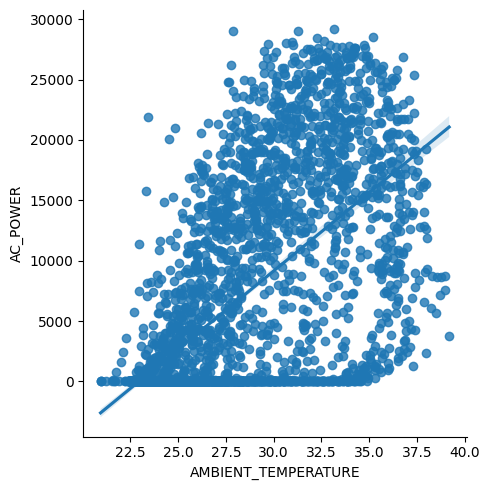

In [142]:
sbn.lmplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=mergedata2)
print('Plant 2')
plt.show()


**Splitting data and fitting into model**

**PLANT 1**

In [143]:
mergedata1.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [144]:
X = mergedata1[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y = mergedata1['AC_POWER'] # Target

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Splits train and test sets

In [147]:
# Training the model
from sklearn.linear_model import LinearRegression

In [148]:
lm = LinearRegression() # creates an instance of LinearRegression() model

In [149]:
lm.fit(X_train, y_train) # fit on training data

LinearRegression()

In [150]:
print('PLANT 1')
print('The intercept for the linear regression is at', lm.intercept_)
print('The linear regression coefficients are:')

coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(coef_df)


PLANT 1
The intercept for the linear regression is at -325.53176671500296
The linear regression coefficients are:
                            Coeff
AMBIENT_TEMPERATURE    -11.941638
MODULE_TEMPERATURE      34.350992
IRRADIATION          27285.225579


**PLANT 2**

In [151]:
mergedata2.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [152]:
X2 = mergedata2[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y2 = mergedata2['AC_POWER'] # Target

In [153]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) # Splits train and test sets

In [154]:
lm2 = LinearRegression()

In [155]:
lm2.fit(X2_train, y2_train)

LinearRegression()

In [156]:
print('PLANT 2')
print('The intercept for the linear regression is at', lm2.intercept_)
print('The linear regression coefficients are:')

coef2_df = pd.DataFrame(lm2.coef_, X2.columns, columns=['Coeff2'])
print(coef2_df)


PLANT 2
The intercept for the linear regression is at 123.60888253440316
The linear regression coefficients are:
                           Coeff2
AMBIENT_TEMPERATURE   -261.046970
MODULE_TEMPERATURE     303.422715
IRRADIATION          16594.609118


**Predicting from models**

**Plant 1**

In [157]:
predictions1 = lm.predict(X_test)
predictions1

array([  221.35083096, 21838.64069335,   137.54221968, 13496.80877067,
         146.44406701, 15684.11193112,   103.60652729, 12646.12295916,
         182.04436206,   148.54136339, 21104.94624764,   155.51971014,
        6173.9676991 ,   145.30140862,   114.73236784, 23949.34295632,
        3175.36545529, 16005.49116925, 21158.29475814, 27466.35550693,
         144.19184579,   120.43666443,   138.18751914,  1245.31263939,
         118.78446305, 20325.08584336,  4878.34694616,   155.67966691,
       14180.29994995,   215.61204861,   200.56091881,  1354.95402241,
          89.65523087,   120.78766947, 13003.92089632,    93.74555706,
         126.35919878,   229.56426626,   126.17025839, 25640.08479361,
        6857.27355442,   103.10257761, 18973.40078122,    81.18596375,
       16582.07021202,   115.7356181 ,   114.55657353, 14130.64018353,
         116.92967774,   127.55643283,   967.4433353 ,  2899.73747408,
         225.49748399,  1003.30713212,   128.10320596, 15782.33997964,
      

Text(0, 0.5, 'Actual Output')

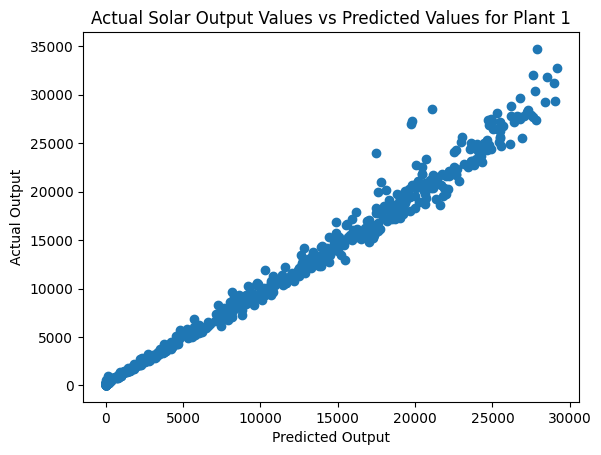

In [158]:
plt.scatter(y_test, predictions1)
plt.title('Actual Solar Output Values vs Predicted Values for Plant 1')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')

**Plant 2**

In [159]:
predictions2 = lm2.predict(X2_test)
predictions2

array([17732.65892779,  5667.30970603,  1071.3893721 ,   849.62353822,
        1019.94979366,  1006.5844602 , 15512.58175205,   436.21412185,
         746.28083264, 24209.92899647, 15058.08727324, 23825.18000306,
         924.66599838,   866.23613875,   860.85893254,  5571.88270431,
         647.57419247,   685.6853898 , 22176.99512031,   865.08189966,
         798.39223943,   802.92038165,   609.21494734,  1047.53111496,
       10803.88810595,  2084.79772544,  9884.07510708,   791.27704569,
       21148.88094055,   781.18703364, 18042.66894568,   941.80012358,
         557.76121289,  1353.30238395,  5321.923425  , 11358.07201427,
       19330.80045992,   837.57107084,  2135.7184112 , 12934.90838187,
       11111.92181757,   868.06423243, 24721.48675618,  1778.76299716,
        2607.18671866,   651.46702427,   754.20303456,  8651.72682767,
        2049.65253174,   766.65356591,  4878.31890852, 12943.40527155,
         747.61009629,  1113.48718402,   869.01760371,  6887.3756849 ,
      

Text(0, 0.5, 'Actual Output')

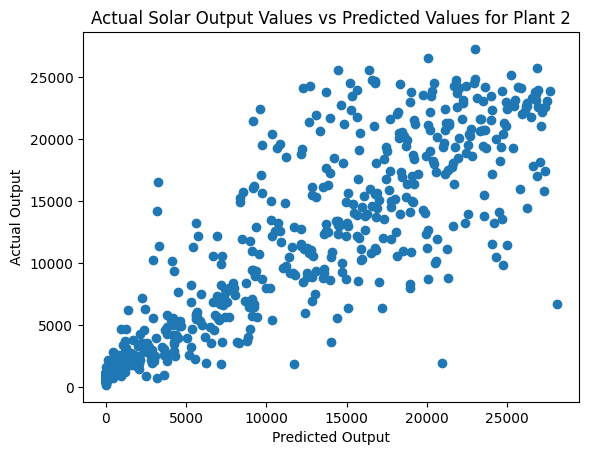

In [160]:
plt.scatter(y2_test, predictions2)
plt.title('Actual Solar Output Values vs Predicted Values for Plant 2')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')


**Evaluating the models**

In [161]:
from sklearn import metrics

# PLANT 1
MAE1 = metrics.mean_absolute_error(y_test,predictions1)
MSE1 = metrics.mean_squared_error(y_test,predictions1)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,predictions1))
print('Metrics for Plant 1 Linear Model')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)
print()

# PLANT 2
MAE1 = metrics.mean_absolute_error(y2_test,predictions2)
MSE1 = metrics.mean_squared_error(y2_test,predictions2)
RMSE1 = np.sqrt(metrics.mean_squared_error(y2_test,predictions2))
print('Metrics for Plant 2 Linear Model')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)

Metrics for Plant 1 Linear Model
MAE:  445.73116295262764
MSE:  730627.2729130596
RMSE:  854.7673794156276

Metrics for Plant 2 Linear Model
MAE:  2179.8695325522217
MSE:  12109828.996984785
RMSE:  3479.9179583698215


**Residuals**

Text(0.5, 1.0, 'Plant 1 Residuals')

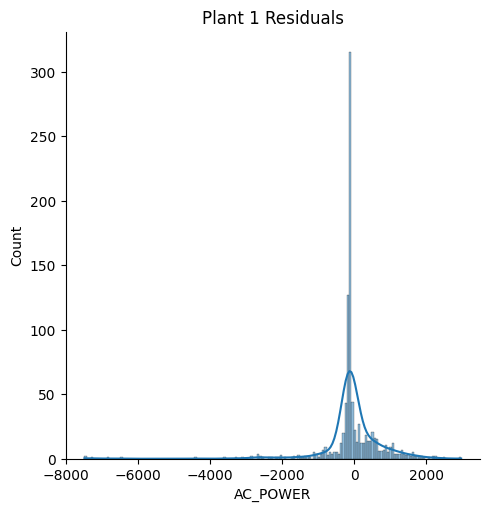

In [162]:
sbn.displot((y_test-predictions1), kde=True)
plt.title('Plant 1 Residuals')

Text(0.5, 1.0, 'Plant 2 Residuals')

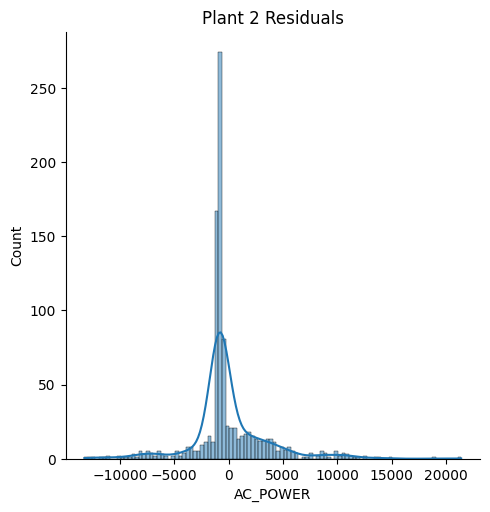

In [163]:
sbn.displot((y2_test-predictions2), kde=True)
plt.title('Plant 2 Residuals')

**Hyperparamater Tuning**

In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming X is your feature matrix and y is your target vector
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

# Define the model
model = Ridge()

# Define the grid of hyperparameters to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best hyperparameters
print('Plant1')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best alpha:", grid_search.best_params_)

# Evaluate the model with best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('Plant2')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X2_train, y2_train)

# Print the best hyperparameters
print("Best alpha:", grid_search.best_params_)

# Evaluate the model with best hyperparameters
best_model = grid_search.best_estimator_
y2_pred = best_model.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error:", mse)


Plant1
Best alpha: {'alpha': 0.01}
Mean Squared Error: 730401.7384130558
Plant2
Best alpha: {'alpha': 0.1}
Mean Squared Error: 12114744.115888042
